# DEVELOPING PREDICTIVE MODELS FOR CROP YIELD ESTIMATION IN INDIA BY ROMEO SIX LABS USING DIGITAL GREEN'S DATASET.

![Alt text](image-9.png)

![Alt text](image.png)

***
## INTRODUCTION.
***
Crop yield estimation is a critical aspect of agriculture, influencing food security, economic stability, and resource allocation. In a country like India, where agriculture is a cornerstone of the economy, accurate crop yield prediction is essential. As climate change intensifies, adaptive farming practices become crucial, making precise yield predictions even more valuable. However, this process often faces challenges due to the country's vast geographical diversity, varying climatic conditions, and evolving agricultural practices. Moreover, small farmers face challenges such as limited access to modern agriculture, unpredictable weather, and resource constraints. Developing predictive models for crop yield estimation in India is imperative to address these challenges effectively.

* N\B: One of the key questions that arises concerns the ability of this system to provide profitable and actionable changes in the economy for small scale, large scale farmers, citizens and the government as a whole.

This question is at the heart of this project, where I delve into the realm of statistical and machine learning analysis to uncover insights that can shape the future of the agricultural sector. The focus is on the Indian agricultural sector, which dedicated in providing sufficient food supply to its ever growing population. By harnessing the power of statistical data analysis and machine learning, Romeo Six Labs aims to provide its stakeholders with the tools to correctly predict farming patterns and provide solutions food crisis.

Using Digital Green comprehensive data-set from various districts in India, focusing on factors influencing rice crop yield, this project is aimed at developing predictive models for crop yield estimation using this valuable data-set. A crop yield model could revolutionise Indian agriculture, and serve as a global model for smallholder farmers. Accurate yield predictions empower smallholder farmers to make informed planting and resource allocation decisions, reducing poverty and malnutrition and improving food security. 
Solutions developed here can drive sustainable agriculture and ensure a stable food supply for the world's growing population.

#### Using data, can we predict target? This would be useful because rationale.

#### Why would it be valuable to be able to predict this target? Who would find this model useful? How accurate does the model need to be in order to serve the stated purpose?


The objective of this challenge is to create a machine learning solution to predict the crop yield per acre of rice or wheat crops in India. Our goal is to empower these farmers and break the cycle of poverty and malnutrition.

This project offers data scientists and machine learning enthusiasts a unique chance to make a real difference in vulnerable populations' lives while advancing global food security in a concise, impactful way.
***

## BUSINESS UNDERSTANDING.
***
The aim of this project is to create a machine learning solution to predict the crop yield per acre of rice or wheat crops in IndiaOur goal is to empower these farmers and break the cycle of poverty and malnutrition.
India is a nation with a high population density, most of whom are small scale farmers that relly on agriculture as a source of income and as a source of food as well. It is thus crucial for the government of India to help small scale farmers maximize their potential when it comes to food production. 
The agriculture sector in India is vast and diverse, with millions of farmers relying on it for their livelihoods. Accurate crop yield estimation can help in:

* Ensuring food security for the country's growing population.
* Efficiently managing resources, such as water, fertilizers, and pesticides.
* Enabling informed policy decisions related to agriculture.
* Mitigating the impact of climate change on crop production.
* Enhancing the income and living standards of farmers.

### Stakeholders involved:
The success of this project will be of great use to different stakeholders in India:
1. Farmers: They are directly affected by crop yield variations and stand to benefit from accurate predictions.

2. Government Agencies: Such as the Ministry of Agriculture, which rely on yield estimates for policy formulation and resource allocation.

3. Agricultural Research Institutions: Involved in developing and validating predictive models.

4. Food Distribution and Supply Chains: Accurate predictions impact the supply chain and food prices.

5. Financial Institutions: Providing loans and insurance to farmers, which depend on yield forecasts.

6. Data scientists and researchers: Responsible for executing the project, analyzing data, and creating statistical data modelsx, and conducting research activities.

### Direct impact
The execution of this project directly affects the core operations of India as a country and the world at large, impacting quality of agricultural produce, revenue streams, and livelihood of citizens.

### Business problem(s) solved
This Data Science endeavor addresses the critical business problem of food security through yield. It aims to identify patterns in agricultural crop yield to improve efficiency and quality of agricultural produce. In this sense, the research questions are:

   * Are the models correcly working?

   * What accuracy level of the models are needed?
    
   * How much time and resources is reduced by using these models?

### Scope of the project
Inside the project's scope are the following components:

* Crop yield Prediction: This project will focus on the development of predictive models for major crops in select regions of India. It will involve the collection and analysis of historical crop yield data, climate data, soil data, and agronomic practices. The models will be designed to accommodate variations in different agro-climatic zones.
* Recommendations: Offering actionable suggestions to curb pneumonia problem in the hospital and the community at large.

### Outside scope
While the project tackles the formidable challenge of crop yield production, certain aspects lie beyond its immediate purview. Such as, the implementation of recommended strategies to running the models and the evaluation of the financial impact arising from the project's outcomes is a distinct consideration.


## Problem Statement.
The problem at hand is to develop predictive models for crop yield estimation in India that can provide accurate and timely forecasts, considering the diverse geographical, climatic, and agronomic factors. Accurate crop yield estimation is essential for farmers, policymakers, and the agricultural sector. It helps in making informed decisions regarding planting, resource allocation, and food distribution. This project aims to address the challenge of predicting rice crop yields based on multiple factors, including fertilizer usage, seedling quantity, land preparation methods, and irrigation techniques.

### Challenge
The primary challenge lies in the correct and accurate prediction of crop yield since a patients wellbeing is a life sensitive matter which is import to the stakeholders as well.

## Objective.
* The primary objective of this project is to develop accurate predictive models for estimating rice crop yields based on the Digital Green data-set. These models will assist farmers and stakeholders in optimizing agricultural practices and improving food production.
* To assess the impact of climate variability on crop yields.
* To provide actionable insights for farmers and policymakers.

### Benefits
By successfully addressing the challenge of correctly predicting crop yields, this project stands to gain several benefits:
* Improved livelihood of citizens: due to availability of food.
* Optimized Resource Allocation: this will enable optimizing operational efficiency.
* Business Sustainability: qualty of crop farmig is improved and its reputation built which a solid foundation for long-term growth.

### Conclusion
Developing predictive models for crop yield estimation in India is essential for the sustainable growth of the agriculture sector, food security, and the welfare of millions of farmers. This project aims to leverage data-driven approaches to address the challenges associated with crop yield prediction and provide valuable insights for stakeholders involved in Indian agriculture.
***

## DATA UNDERSTANDING
***
### Data sources
The data-set has been downloaded from zindi and was collected through a survey conducted across multiple districts in India. It consists of a variety of factors that could potentially impact the yield of rice crops. These factors include things like the type and amount of fertilizers used, the quantity of seedlings planted, methods of preparing the land, different irrigation techniques employed, among other features. The dataset comprises more than 5000 data points, each having more than 40 features.

### Data size
The dataset is divided into three: Train contains the target. This is the dataset that we will use to train our models. Test resembles Train.csv but without the target-related columns. This is the dataset on which you will apply your model to. The variable dataset has variables found in train and test.

Models. 
There are several models and approaches that will be used to predict crop yields:

1. Statistical Models: These model will use historical data on crop yields, weather patterns, soil characteristics, and other relevant factors to make predictions. Time series analysis is an example of statistical method that will be applied.

2. Machine Learning Models: Machine learning techniques such as decision trees, random forests, support vector machines, and neural networks will be used to analyze complex interactions between various factors affecting crop yields.

3. Crop Simulation Models: Crop simulation models like DSSAT (Decision Support System for Agrotechnology Transfer) and APSIM (Agricultural Production Systems sIMulator) simulate the growth of crops based on input data like weather, soil, and management practices. They can predict yields under different scenario. 
***

## DATA PREPARATION
***

### Importing Libraries.

In [19]:
#loading libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
import sklearn as sk
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import Binarizer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.model_selection import train_test_split
import itertools 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
import pmdarima as pm
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings('ignore')
# Displaying all columns
pd.set_option("display.max_columns", None)
plt.style.use("fivethirtyeight")



### Reading the Data.

In [4]:
# read the data
train = pd.read_csv("Train (1).csv")
test = pd.read_csv("Test.csv")
# check the shape of the train data
train.head()

,ID,District,Block,CultLand,CropCultLand,LandPreparationMethod,CropTillageDate,CropTillageDepth,CropEstMethod,RcNursEstDate,...,Harv_method,Harv_date,Harv_hand_rent,Threshing_date,Threshing_method,Residue_length,Residue_perc,Stubble_use,Acre,Yield
0,ID_GTFAC7PEVWQ9,Nalanda,Noorsarai,45,40,TractorPlough FourWheelTracRotavator,2022-07-20,5,Manual_PuddledRandom,2022-06-27,...,machine,2022-11-16,NaN,2022-11-16,machine,30,40,plowed_in_soil,0.312500,600
1,ID_TK40ARLSPOKS,Nalanda,Rajgir,26,26,WetTillagePuddling TractorPlough FourWheelTrac...,2022-07-18,5,Manual_PuddledRandom,2022-06-20,...,hand,2022-11-25,3.0,2022-12-24,machine,24,10,plowed_in_soil,0.312500,600
2,ID_1FJY2CRIMLZZ,Gaya,Gurua,10,10,TractorPlough FourWheelTracRotavator,2022-06-30,6,Manual_PuddledRandom,2022-06-20,...,hand,2022-12-12,480.0,2023-01-11,machine,30,10,plowed_in_soil,0.148148,225
3,ID_I3IPXS4DB7NE,Gaya,Gurua,15,15,TractorPlough FourWheelTracRotavator,2022-06-16,6,Manual_PuddledRandom,2022-06-17,...,hand,2022-12-02,240.0,2022-12-29,hand,26,10,plowed_in_soil,0.222222,468
4,ID_4T8YQWXWHB4A,Nalanda,Noorsarai,60,60,TractorPlough WetTillagePuddling,2022-07-19,4,Manual_PuddledRandom,2022-06-21,...,machine,2022-11-30,NaN,2022-12-02,machine,24,40,plowed_in_soil,0.468750,550


In [5]:
# check the shape of the test data
test.head()

,ID,District,Block,CultLand,CropCultLand,LandPreparationMethod,CropTillageDate,CropTillageDepth,CropEstMethod,RcNursEstDate,...,MineralFertAppMethod.1,Harv_method,Harv_date,Harv_hand_rent,Threshing_date,Threshing_method,Residue_length,Residue_perc,Stubble_use,Acre
0,ID_F9XXEXN2ADR2,Jamui,Khaira,20,13,TractorPlough,2022-07-24,4,Manual_PuddledLine,2022-07-03,...,Broadcasting,hand,2022-12-02,500.0,2022-12-28,hand,22,10,plowed_in_soil,0.272727
1,ID_SO3VW2X4QO93,Jamui,Khaira,25,25,TractorPlough,2022-07-24,5,Manual_PuddledRandom,2022-07-08,...,Broadcasting,hand,2022-11-12,150.0,2022-12-20,machine,28,10,plowed_in_soil,0.227273
2,ID_UKUQ7JM8E894,Nalanda,Rajgir,30,30,WetTillagePuddling TractorPlough FourWheelTrac...,2022-07-07,5,Manual_PuddledRandom,2022-06-24,...,Broadcasting,hand,2022-11-24,1200.0,2022-12-05,machine,28,10,plowed_in_soil,0.281250
3,ID_QUISMWEZR2H4,Vaishali,Mahua,15,10,WetTillagePuddling TractorPlough BullockPlough...,2022-07-04,5,Manual_PuddledRandom,2022-06-20,...,SoilApplied,hand,2022-10-15,300.0,2022-10-25,hand,30,10,plowed_in_soil,0.136364
4,ID_25JGI455VKCZ,Nalanda,Rajgir,30,10,WetTillagePuddling TractorPlough FourWheelTrac...,2022-07-21,3,Manual_PuddledRandom,2022-06-24,...,Broadcasting,machine,2022-11-20,NaN,2022-11-20,machine,26,40,plowed_in_soil,0.312500


In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3870 entries, 0 to 3869
Data columns (total 44 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   ID                                  3870 non-null   object 
 1   District                            3870 non-null   object 
 2   Block                               3870 non-null   object 
 3   CultLand                            3870 non-null   int64  
 4   CropCultLand                        3870 non-null   int64  
 5   LandPreparationMethod               3870 non-null   object 
 6   CropTillageDate                     3870 non-null   object 
 7   CropTillageDepth                    3870 non-null   int64  
 8   CropEstMethod                       3870 non-null   object 
 9   RcNursEstDate                       3787 non-null   object 
 10  SeedingSowingTransplanting          3870 non-null   object 
 11  SeedlingsPerPit                     3581 no

In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1290 entries, 0 to 1289
Data columns (total 43 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   ID                                  1290 non-null   object 
 1   District                            1290 non-null   object 
 2   Block                               1290 non-null   object 
 3   CultLand                            1290 non-null   int64  
 4   CropCultLand                        1290 non-null   int64  
 5   LandPreparationMethod               1290 non-null   object 
 6   CropTillageDate                     1290 non-null   object 
 7   CropTillageDepth                    1290 non-null   int64  
 8   CropEstMethod                       1290 non-null   object 
 9   RcNursEstDate                       1247 non-null   object 
 10  SeedingSowingTransplanting          1290 non-null   object 
 11  SeedlingsPerPit                     1187 no

In [8]:
train.shape
test.shape


(1290, 43)

### Data Cleaning

In [9]:
# Checking for duplicate rows in ID column
train['ID'].duplicated().sum()

0

In [10]:
# Checking for duplicate rows in test ID column
test['ID'].duplicated().sum()

0

In [11]:
# Checking for missing values
train.isnull().sum().sort_values(ascending=False)

2appDaysUrea                          2700
2tdUrea                               2694
CropOrgFYM                            2674
Ganaura                               2417
BasalUrea                             1704
PCropSolidOrgFertAppMethod            1337
OrgFertilizers                        1335
TransIrriCost                          882
1tdUrea                                556
1appDaysUrea                           556
BasalDAP                               543
TransplantingIrrigationPowerSource     503
FirstTopDressFert                      485
MineralFertAppMethod.1                 481
NursDetFactor                          289
TransDetFactor                         289
SeedlingsPerPit                        289
Harv_hand_rent                         252
StandingWater                          238
TransplantingIrrigationHours           193
CropbasalFerts                         188
TransplantingIrrigationSource          115
RcNursEstDate                           83
Residue_per

We dropped these columns:'2appDaysUrea', '2tdUrea', 'CropOrgFYM', 'Ganaura', 'BasalUrea', 'PCropSolidOrgFertAppMethod', 'OrgFertilizers', 'TransIrriCost', '1tdUrea', '1appDaysUrea', '1appDaysUrea', 'TransplantingIrrigationPowerSource' due to the number of missing values they have as compared to the total number of entries in the dataset.

In [12]:
irrelevant_cols = ['2appDaysUrea', '2tdUrea', 'CropOrgFYM', 'Ganaura', 'BasalUrea', 'PCropSolidOrgFertAppMethod', 'OrgFertilizers', 'TransIrriCost', '1tdUrea', '1appDaysUrea', '1appDaysUrea', 'TransplantingIrrigationPowerSource']
train.drop(irrelevant_cols, axis=1, inplace=True) 

In [13]:
train.isnull().sum().sort_values(ascending=False)

BasalDAP                         543
FirstTopDressFert                485
MineralFertAppMethod.1           481
TransDetFactor                   289
NursDetFactor                    289
SeedlingsPerPit                  289
Harv_hand_rent                   252
StandingWater                    238
TransplantingIrrigationHours     193
CropbasalFerts                   188
TransplantingIrrigationSource    115
RcNursEstDate                     83
Threshing_date                     0
Threshing_method                   0
Residue_length                     0
Residue_perc                       0
Stubble_use                        0
Harv_method                        0
Acre                               0
Harv_date                          0
ID                                 0
MineralFertAppMethod               0
NoFertilizerAppln                  0
District                           0
SeedingSowingTransplanting         0
CropEstMethod                      0
CropTillageDepth                   0
C

In [14]:
# Checking for missing values in the test dataset
test.isnull().sum().sort_values(ascending=False)

2appDaysUrea                          882
2tdUrea                               875
CropOrgFYM                            868
Ganaura                               795
BasalUrea                             571
PCropSolidOrgFertAppMethod            416
OrgFertilizers                        415
TransIrriCost                         317
BasalDAP                              191
1appDaysUrea                          178
1tdUrea                               177
TransplantingIrrigationPowerSource    171
FirstTopDressFert                     149
MineralFertAppMethod.1                146
SeedlingsPerPit                       103
NursDetFactor                         103
TransDetFactor                        103
StandingWater                          79
TransplantingIrrigationHours           77
CropbasalFerts                         76
Harv_hand_rent                         73
TransplantingIrrigationSource          46
RcNursEstDate                          43
Harv_date                         

In [15]:
irrelevant_test_cols = ['2appDaysUrea', '2tdUrea', 'CropOrgFYM', 'Ganaura', 'BasalUrea', 'PCropSolidOrgFertAppMethod', 'OrgFertilizers', 'TransIrriCost', '1tdUrea', '1appDaysUrea', '1appDaysUrea', 'TransplantingIrrigationPowerSource']
test.drop(irrelevant_test_cols, axis=1, inplace=True)

In [16]:
# Checking for missing values in the test dataset
test.isnull().sum().sort_values(ascending=False)

BasalDAP                         191
FirstTopDressFert                149
MineralFertAppMethod.1           146
SeedlingsPerPit                  103
TransDetFactor                   103
NursDetFactor                    103
StandingWater                     79
TransplantingIrrigationHours      77
CropbasalFerts                    76
Harv_hand_rent                    73
TransplantingIrrigationSource     46
RcNursEstDate                     43
Harv_date                          0
MineralFertAppMethod               0
Threshing_date                     0
Threshing_method                   0
Residue_length                     0
Residue_perc                       0
Stubble_use                        0
Harv_method                        0
ID                                 0
NoFertilizerAppln                  0
District                           0
SeedingSowingTransplanting         0
CropEstMethod                      0
CropTillageDepth                   0
CropTillageDate                    0
L

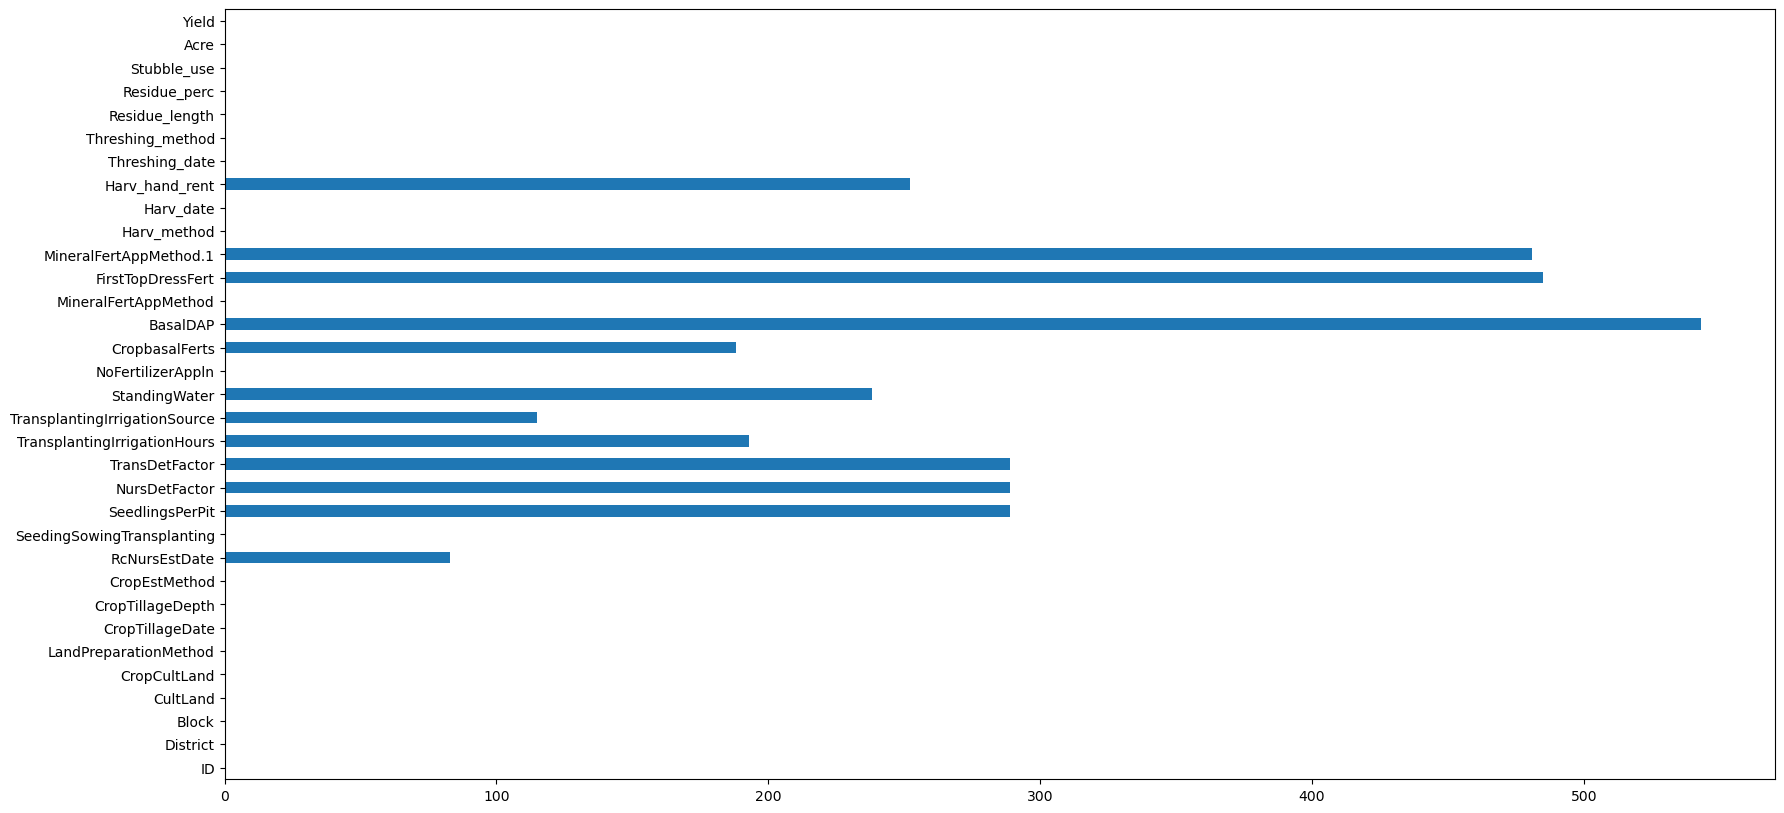

In [28]:
# plot the histogram of the missing values
import matplotlib.pyplot as plt
train.isnull().sum().plot(kind='barh', figsize=(20, 10))
plt.show()

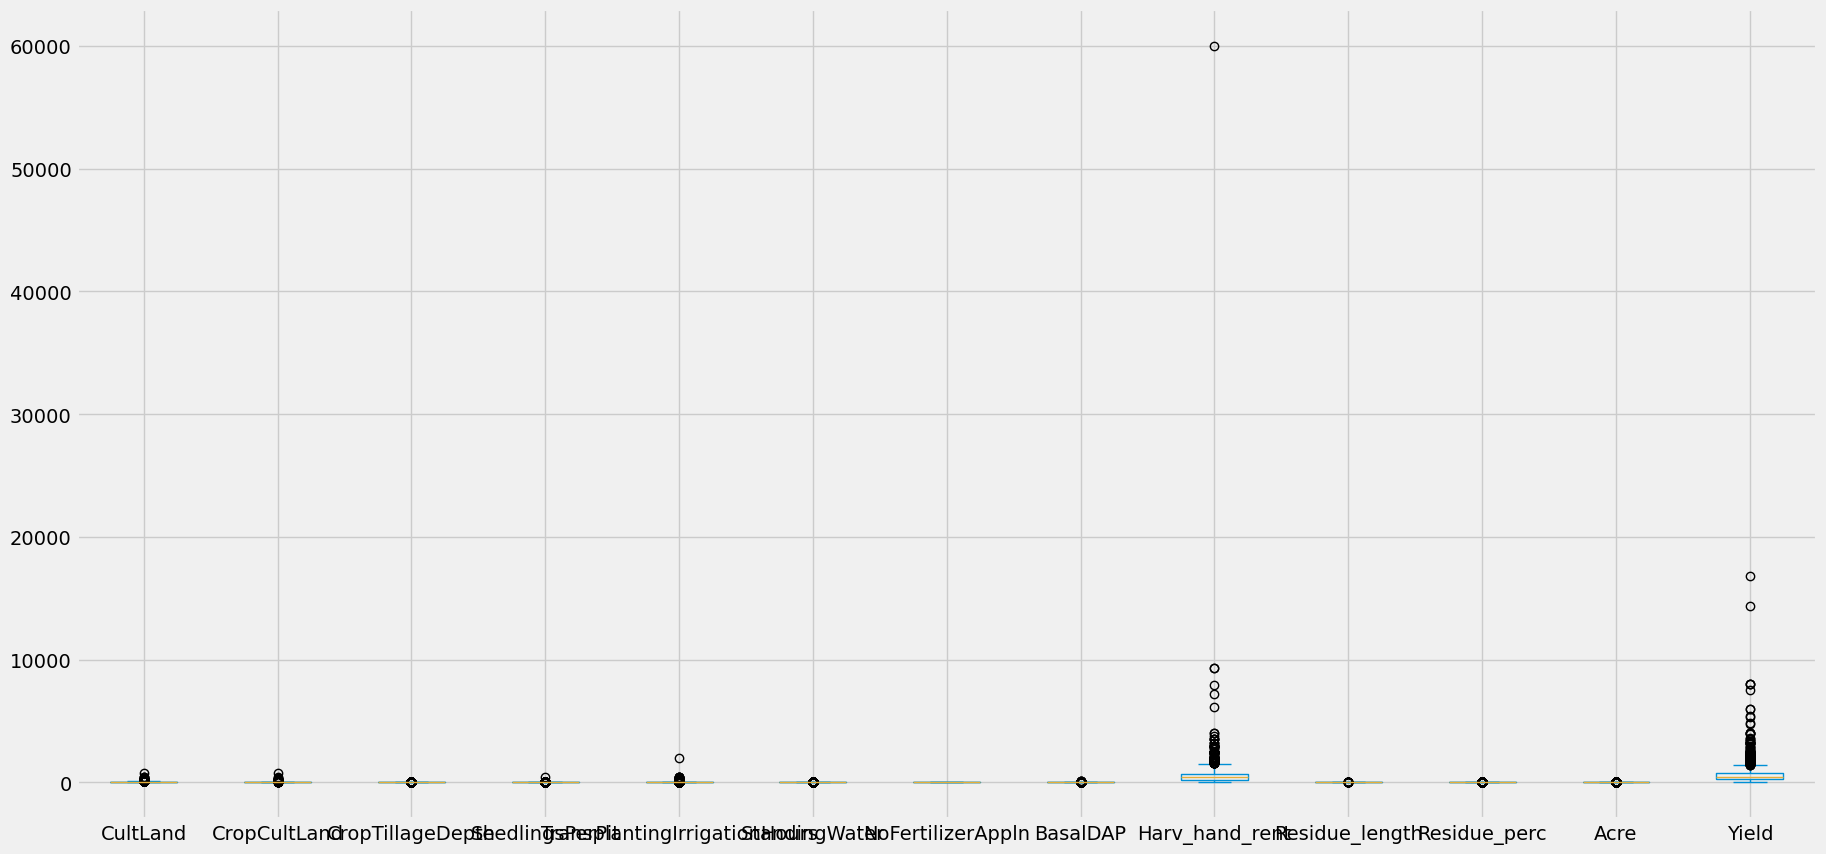

In [21]:
# checking outliers
train.plot(kind='box', figsize=(20, 10))
plt.show()